<a href="https://colab.research.google.com/github/nafalrifky/midterm-deep-learning/blob/main/midterm_Clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Deep Learning - Clustering
## Nafal Rifky Atsilah Maulana - 1103223106

In this assignment, you will build a customer clustering pipeline. You will use a customer dataset, clean and preprocess the data, handle missing values and outliers, and prepare useful features. Then you will apply unsupervised learning methods (such as k-means, hierarchical clustering, or DBSCAN) to group customers based on their spending and payment behavior. Your workflow should include data preprocessing, model training, choosing the number of clusters, evaluating the clusters, and explaining what each cluster represents.


In [3]:
!pip install -U -q gdown

In [4]:
folder_id = '1FsQtOI_QES15zZLmEw099MGAR5-rnsOP'
print(f"Downloading files from folder ID: {folder_id}")
!gdown --folder --id {folder_id}

print("Download complete. You can list the files in the current directory to see the downloaded content.")

/usr/local/lib/python3.12/dist-packages/gdown/__main__.py:140: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Retrieving folder contents
Processing file 1XtaKeD7b-la2R1ygFBNLj16VD1k0MB2Q clusteringmidterm.csv
Retrieving folder contents completed
Building directory structure
Building directory structure completed
Downloading...
From: https://drive.google.com/uc?id=1XtaKeD7b-la2R1ygFBNLj16VD1k0MB2Q
To: /content/Machine Learning/clusteringmidterm.csv
100% 1.01M/1.01M [00:00<00:00, 102MB/s]
Download completed
Download complete. You can list the files in the current directory to see the downloaded content.


In [5]:
import pandas as pd

df = pd.read_csv('Machine Learning/clusteringmidterm.csv')
df.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


## Data Preprocessing and Cleaning



## Further Statistics and Visualization



In [23]:
print('Descriptive statistics of the DataFrame including Cluster column:')
print(df.describe())

Descriptive statistics of the DataFrame including Cluster column:
            BALANCE  BALANCE_FREQUENCY     PURCHASES  ONEOFF_PURCHASES  \
count   8950.000000        8950.000000   8950.000000       8950.000000   
mean    1564.474828           0.877271   1003.204834        592.437371   
std     2081.531879           0.236904   2136.634782       1659.887917   
min        0.000000           0.000000      0.000000          0.000000   
25%      128.281915           0.888889     39.635000          0.000000   
50%      873.385231           1.000000    361.280000         38.000000   
75%     2054.140036           1.000000   1110.130000        577.405000   
max    19043.138560           1.000000  49039.570000      40761.250000   

       INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
count             8950.000000   8950.000000          8950.000000   
mean               411.067645    978.871112             0.490351   
std                904.338115   2097.163877             0.40137

**Reasoning**:
To understand the size and distribution of each cluster, I will create a count plot of the 'Cluster' column. This visualization will show how many customers fall into each segment.

/tmp/ipython-input-60262925.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Cluster', data=df, palette='viridis')


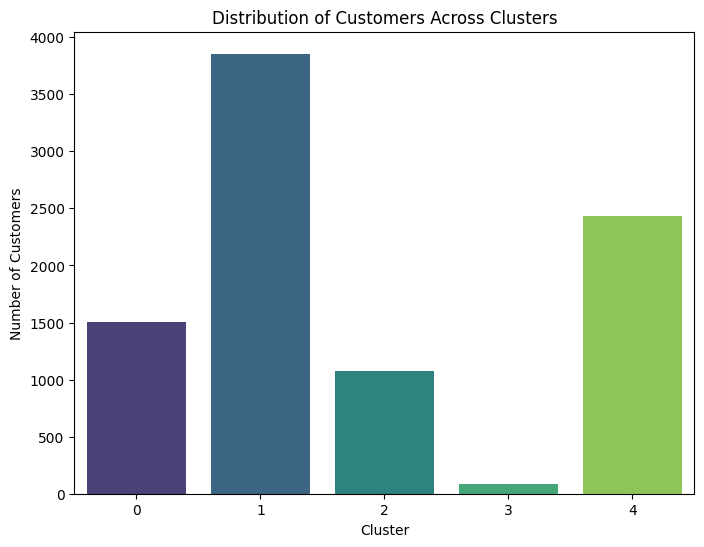

In [24]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
sns.countplot(x='Cluster', data=df, palette='viridis')
plt.title('Distribution of Customers Across Clusters')
plt.xlabel('Cluster')
plt.ylabel('Number of Customers')
plt.show()


**Reasoning**:
To visualize the characteristics of each cluster based on key financial metrics, I will create box plots for 'BALANCE', 'Total_Purchases', and 'CASH_ADVANCE' against the 'Cluster' column. This will allow for a clear comparison of these distributions across the different customer segments.

/tmp/ipython-input-1307950827.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Cluster', y='BALANCE', data=df, palette='viridis', ax=axes[0])
/tmp/ipython-input-1307950827.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Cluster', y='Total_Purchases', data=df, palette='viridis', ax=axes[1])
/tmp/ipython-input-1307950827.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Cluster', y='CASH_ADVANCE', data=df, palette='viridis', ax=axes[2])


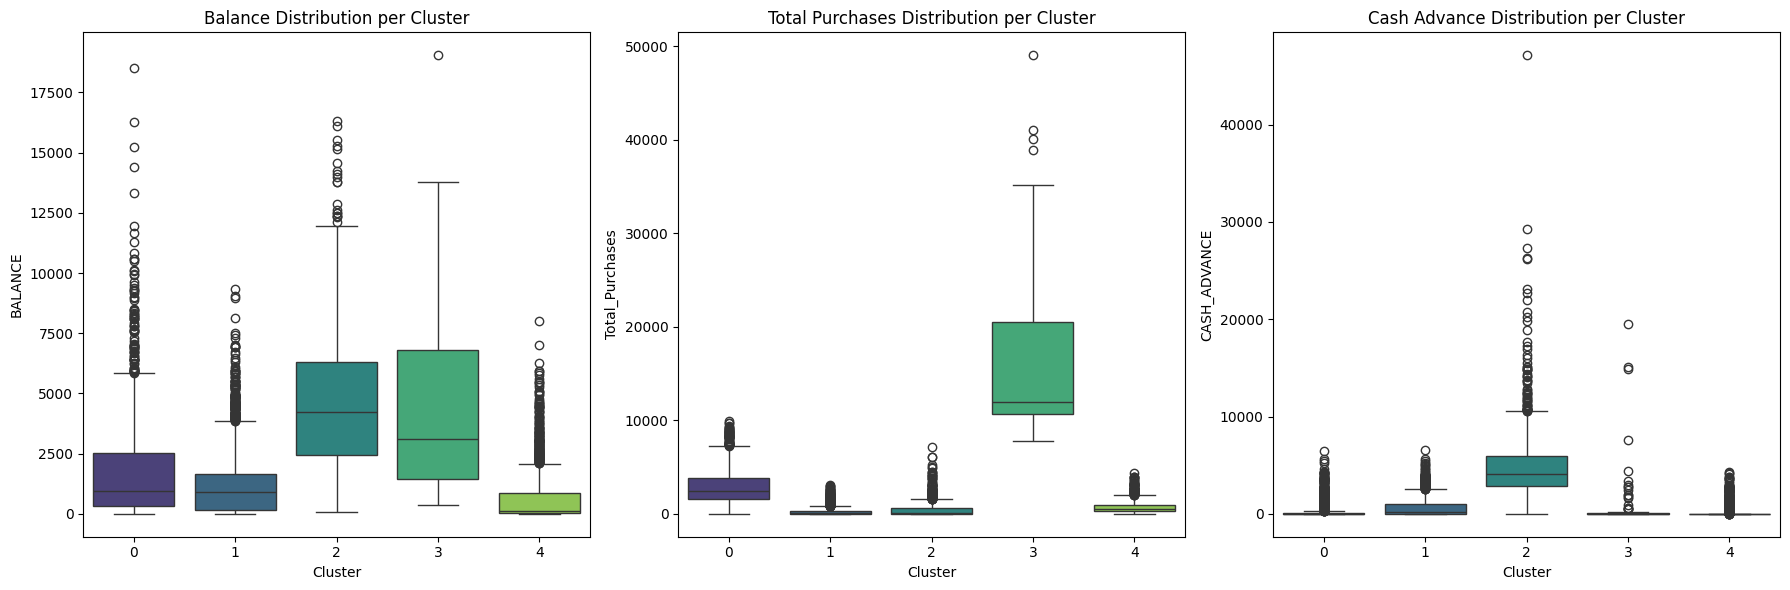

In [25]:
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

sns.boxplot(x='Cluster', y='BALANCE', data=df, palette='viridis', ax=axes[0])
axes[0].set_title('Balance Distribution per Cluster')

sns.boxplot(x='Cluster', y='Total_Purchases', data=df, palette='viridis', ax=axes[1])
axes[1].set_title('Total Purchases Distribution per Cluster')

sns.boxplot(x='Cluster', y='CASH_ADVANCE', data=df, palette='viridis', ax=axes[2])
axes[2].set_title('Cash Advance Distribution per Cluster')

plt.tight_layout()
plt.show()

**Reasoning**:
The first step in data preprocessing is to check for missing values. I will use `df.isnull().sum()` to get a count of missing values for each column.



In [6]:
print('Missing values before imputation:')
print(df.isnull().sum())

Missing values before imputation:
CUST_ID                               0
BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64


**Reasoning**:
Based on the previous output showing missing values in 'MINIMUM_PAYMENTS' and 'CREDIT_LIMIT', I will fill these missing values with their respective median to maintain the distribution.



In [7]:
df['MINIMUM_PAYMENTS'].fillna(df['MINIMUM_PAYMENTS'].median(), inplace=True)
df['CREDIT_LIMIT'].fillna(df['CREDIT_LIMIT'].median(), inplace=True)
print('Missing values after imputation:')
print(df.isnull().sum())

Missing values after imputation:
CUST_ID                             0
BALANCE                             0
BALANCE_FREQUENCY                   0
PURCHASES                           0
ONEOFF_PURCHASES                    0
INSTALLMENTS_PURCHASES              0
CASH_ADVANCE                        0
PURCHASES_FREQUENCY                 0
ONEOFF_PURCHASES_FREQUENCY          0
PURCHASES_INSTALLMENTS_FREQUENCY    0
CASH_ADVANCE_FREQUENCY              0
CASH_ADVANCE_TRX                    0
PURCHASES_TRX                       0
CREDIT_LIMIT                        0
PAYMENTS                            0
MINIMUM_PAYMENTS                    0
PRC_FULL_PAYMENT                    0
TENURE                              0
dtype: int64


/tmp/ipython-input-3027238779.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['MINIMUM_PAYMENTS'].fillna(df['MINIMUM_PAYMENTS'].median(), inplace=True)
/tmp/ipython-input-3027238779.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(v

**Reasoning**:
The previous code block correctly filled missing values but generated a FutureWarning about the `inplace=True` argument. To address this, I will update the code to assign the result of `fillna` back to the DataFrame columns, which is the recommended practice and achieves the same outcome without the warning.



In [8]:
df['MINIMUM_PAYMENTS'] = df['MINIMUM_PAYMENTS'].fillna(df['MINIMUM_PAYMENTS'].median())
df['CREDIT_LIMIT'] = df['CREDIT_LIMIT'].fillna(df['CREDIT_LIMIT'].median())
print('Missing values after imputation:')
print(df.isnull().sum())

Missing values after imputation:
CUST_ID                             0
BALANCE                             0
BALANCE_FREQUENCY                   0
PURCHASES                           0
ONEOFF_PURCHASES                    0
INSTALLMENTS_PURCHASES              0
CASH_ADVANCE                        0
PURCHASES_FREQUENCY                 0
ONEOFF_PURCHASES_FREQUENCY          0
PURCHASES_INSTALLMENTS_FREQUENCY    0
CASH_ADVANCE_FREQUENCY              0
CASH_ADVANCE_TRX                    0
PURCHASES_TRX                       0
CREDIT_LIMIT                        0
PAYMENTS                            0
MINIMUM_PAYMENTS                    0
PRC_FULL_PAYMENT                    0
TENURE                              0
dtype: int64


**Reasoning**:
Now that missing values have been handled, I will display the data types of all columns to verify their current types and identify any columns that might need type conversion before proceeding with further analysis or feature engineering.



In [9]:
print('Data types of all columns:')
print(df.info())

Data types of all columns:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non

**Reasoning**:
To get an initial overview of the distribution of numerical features and identify potential outliers, I will generate descriptive statistics for all numerical columns in the DataFrame.



In [10]:
print('Descriptive statistics for numerical columns:')
print(df.describe())

Descriptive statistics for numerical columns:
            BALANCE  BALANCE_FREQUENCY     PURCHASES  ONEOFF_PURCHASES  \
count   8950.000000        8950.000000   8950.000000       8950.000000   
mean    1564.474828           0.877271   1003.204834        592.437371   
std     2081.531879           0.236904   2136.634782       1659.887917   
min        0.000000           0.000000      0.000000          0.000000   
25%      128.281915           0.888889     39.635000          0.000000   
50%      873.385231           1.000000    361.280000         38.000000   
75%     2054.140036           1.000000   1110.130000        577.405000   
max    19043.138560           1.000000  49039.570000      40761.250000   

       INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
count             8950.000000   8950.000000          8950.000000   
mean               411.067645    978.871112             0.490351   
std                904.338115   2097.163877             0.401371   
min            

## Feature Engineering




**Reasoning**:
I need to create several new features as instructed. This involves summing, dividing, and handling potential division-by-zero errors for each new feature. After creating all the features, I will display the head of the DataFrame to verify their creation.



In [11]:
df['Total_Purchases'] = df['ONEOFF_PURCHASES'] + df['INSTALLMENTS_PURCHASES']
df['Monthly_Avg_Purchases'] = df['Total_Purchases'] / df['TENURE'].replace(0, 1) # Replace 0 with 1 to avoid division by zero, assuming 0 tenure implies no monthly purchases
df.loc[df['TENURE'] == 0, 'Monthly_Avg_Purchases'] = 0 # If TENURE was 0, set Monthly_Avg_Purchases to 0
df['Monthly_Cash_Advance'] = df['CASH_ADVANCE'] / df['TENURE'].replace(0, 1)
df.loc[df['TENURE'] == 0, 'Monthly_Cash_Advance'] = 0

df['Purchase_Type_Ratio'] = df['ONEOFF_PURCHASES'] / df['Total_Purchases'].replace(0, 1)
df.loc[df['Total_Purchases'] == 0, 'Purchase_Type_Ratio'] = 0

df['Payments_to_Purchases_Ratio'] = df['PAYMENTS'] / df['Total_Purchases'].replace(0, 1)
df.loc[df['Total_Purchases'] == 0, 'Payments_to_Purchases_Ratio'] = 0

df['Balance_to_Limit_Ratio'] = df['BALANCE'] / df['CREDIT_LIMIT'].replace(0, 1) # Replace 0 with 1 to avoid division by zero, as credit limit cannot be 0
df.loc[df['CREDIT_LIMIT'] == 0, 'Balance_to_Limit_Ratio'] = 0

print('DataFrame with new features:')
df.head()

DataFrame with new features:


,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,...,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,Total_Purchases,Monthly_Avg_Purchases,Monthly_Cash_Advance,Purchase_Type_Ratio,Payments_to_Purchases_Ratio,Balance_to_Limit_Ratio
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,...,201.802084,139.509787,0.000000,12,95.40,7.950000,0.000000,0.0,2.115326,0.040901
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,...,4103.032597,1072.340217,0.222222,12,0.00,0.000000,536.912124,0.0,0.000000,0.457495
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,...,622.066742,627.284787,0.000000,12,773.17,64.430833,0.000000,1.0,0.804567,0.332687
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,...,0.000000,312.343947,0.000000,12,1499.00,124.916667,17.149001,1.0,0.000000,0.222223
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,...,678.334763,244.791237,0.000000,12,16.00,1.333333,0.000000,1.0,42.395923,0.681429


## Apply Unsupervised Learning (Clustering)



**Reasoning**:
Before applying clustering algorithms, it is essential to scale the numerical features. This ensures that features with larger values do not dominate the distance calculations and allows the clustering algorithm to treat all features equally. I will identify the numerical features (excluding 'CUST_ID') and then apply `StandardScaler`.



In [12]:
from sklearn.preprocessing import StandardScaler

# Drop CUST_ID as it is an identifier and not a feature for clustering
features_df = df.drop('CUST_ID', axis=1)

# Select all numerical columns for scaling
# Assuming all remaining columns are numerical and relevant for clustering after dropping CUST_ID
features_to_scale = features_df.columns.tolist()

# Initialize StandardScaler
scaler = StandardScaler()

# Fit and transform the data
scaled_features = scaler.fit_transform(features_df[features_to_scale])

# Convert scaled features back to a DataFrame for easier handling, retaining column names
scaled_df = pd.DataFrame(scaled_features, columns=features_to_scale)

print('Scaled features head:')
print(scaled_df.head())
print('\nDescriptive statistics of scaled features:')
print(scaled_df.describe())

Scaled features head:
    BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
0 -0.731989          -0.249434  -0.424900         -0.356934   
1  0.786961           0.134325  -0.469552         -0.356934   
2  0.447135           0.518084  -0.107668          0.108889   
3  0.049099          -1.016953   0.232058          0.546189   
4 -0.358775           0.518084  -0.462063         -0.347294   

   INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
0               -0.349079     -0.466786            -0.806490   
1               -0.454576      2.605605            -1.221758   
2               -0.454576     -0.466786             1.269843   
3               -0.454576     -0.368653            -1.014125   
4               -0.454576     -0.466786            -1.014125   

   ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
0                   -0.678661                         -0.707313   
1                   -0.678661                         -0.916995   
2            

**Reasoning**:
Now that the features have been scaled, I will apply the KMeans clustering algorithm to group the customers. I'll instantiate KMeans with 5 clusters and a random state for reproducibility, fit it to the scaled data, and then assign the resulting cluster labels back to the original DataFrame.



In [13]:
from sklearn.cluster import KMeans

# Instantiate KMeans with 5 clusters and a random state for reproducibility
kmeans = KMeans(n_clusters=5, random_state=42, n_init=10) # Added n_init to suppress warning

# Fit the KMeans model to the scaled data
kmeans.fit(scaled_df)

# Add the cluster labels to the original DataFrame
df['Cluster'] = kmeans.labels_

print('DataFrame with new "Cluster" column:')
print(df.head())

DataFrame with new "Cluster" column:
  CUST_ID      BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
0  C10001    40.900749           0.818182      95.40              0.00   
1  C10002  3202.467416           0.909091       0.00              0.00   
2  C10003  2495.148862           1.000000     773.17            773.17   
3  C10004  1666.670542           0.636364    1499.00           1499.00   
4  C10005   817.714335           1.000000      16.00             16.00   

   INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
0                    95.4      0.000000             0.166667   
1                     0.0   6442.945483             0.000000   
2                     0.0      0.000000             1.000000   
3                     0.0    205.788017             0.083333   
4                     0.0      0.000000             0.083333   

   ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  ...  \
0                    0.000000                          0.0833

K-Means clustering has been applied to the scaled features, and the generated cluster labels have been added to the original DataFrame as a new column named 'Cluster'.

## Determine Optimal Number of Clusters




**Reasoning**:
To determine the optimal number of clusters using the Elbow Method, I will iterate through a range of cluster numbers, fit a KMeans model for each, record its inertia (sum of squared distances), and then plot these values to find the 'elbow' point.



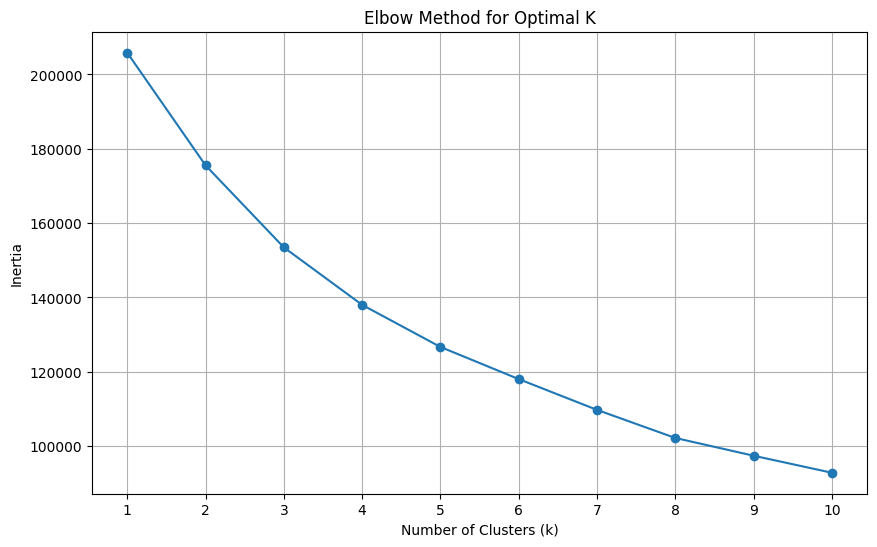

Elbow method plot displayed. Look for the 'elbow' point to determine the optimal number of clusters.


In [14]:
import matplotlib.pyplot as plt

inertia_values = []

# Try different numbers of clusters from 1 to 10
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(scaled_df)
    inertia_values.append(kmeans.inertia_)

# Plot the Elbow Method graph
plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), inertia_values, marker='o')
plt.title('Elbow Method for Optimal K')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.xticks(range(1, 11))
plt.grid(True)
plt.show()
print("Elbow method plot displayed. Look for the 'elbow' point to determine the optimal number of clusters.")

**Reasoning**:
To further determine the optimal number of clusters, I will use the Silhouette Score. This method measures how similar an object is to its own cluster compared to other clusters. I will calculate and plot the Silhouette Score for a range of clusters to identify the number of clusters that yields the highest average score.



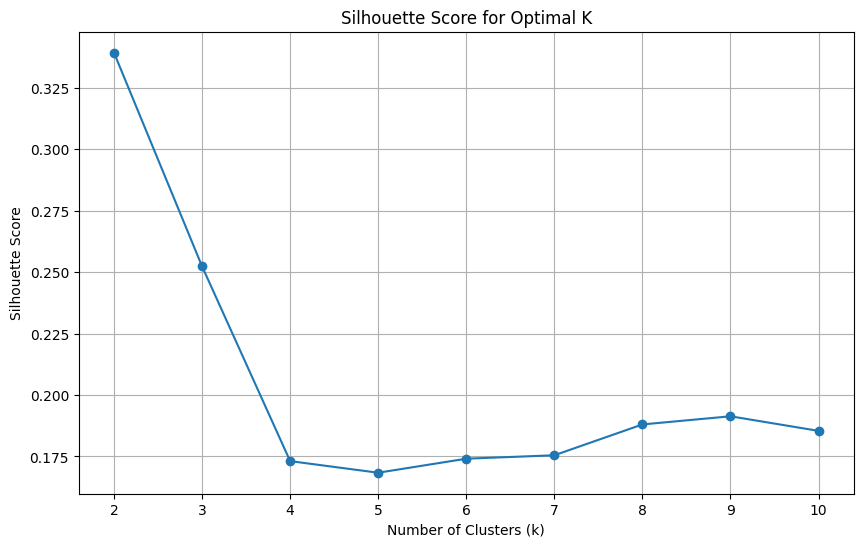

Silhouette score plot displayed. Look for the highest score to determine the optimal number of clusters.


In [15]:
from sklearn.metrics import silhouette_score

silhouette_scores = []

# Exclude k=1 for silhouette score as it requires at least two clusters
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(scaled_df)
    score = silhouette_score(scaled_df, kmeans.labels_)
    silhouette_scores.append(score)

# Plot the Silhouette Score graph
plt.figure(figsize=(10, 6))
plt.plot(range(2, 11), silhouette_scores, marker='o')
plt.title('Silhouette Score for Optimal K')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Silhouette Score')
plt.xticks(range(2, 11))
plt.grid(True)
plt.show()
print("Silhouette score plot displayed. Look for the highest score to determine the optimal number of clusters.")

## Evaluate and Interpret Clusters



**Reasoning**:
To understand the characteristics of each cluster, I will calculate the mean values of all features for each cluster. This will provide insights into how different customer segments behave regarding their spending and payment patterns.



In [26]:
cluster_means = df.drop('CUST_ID', axis=1).groupby('Cluster').mean()
print('Mean values of features for each cluster:')
print(cluster_means)

Mean values of features for each cluster:
             BALANCE  BALANCE_FREQUENCY     PURCHASES  ONEOFF_PURCHASES  \
Cluster                                                                   
0        1838.974447           0.973847   2903.874132       1993.187425   
1        1161.113438           0.815314    257.565883        213.356283   
2        4621.838428           0.961293    474.391923        284.597815   
3        4622.736443           0.976082  16035.901190      10924.389167   
4         584.193678           0.875385    724.724871        107.350164   

         INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
Cluster                                                              
0                    911.118510    349.649488             0.905997   
1                     44.343292    632.988373             0.160230   
2                    189.889038   4970.532428             0.283861   
3                   5111.512024   1034.093965             0.917460   
4           

**Reasoning**:
The previous code failed because it attempted to calculate the mean of the 'CUST_ID' column, which is of object (string) type. To fix this, I will drop the 'CUST_ID' column before grouping the DataFrame by 'Cluster' and calculating the mean, ensuring that only numerical columns are averaged.



In [17]:
cluster_means = df.drop('CUST_ID', axis=1).groupby('Cluster').mean()
print('Mean values of features for each cluster:')
print(cluster_means)

Mean values of features for each cluster:
             BALANCE  BALANCE_FREQUENCY     PURCHASES  ONEOFF_PURCHASES  \
Cluster                                                                   
0        1838.974447           0.973847   2903.874132       1993.187425   
1        1161.113438           0.815314    257.565883        213.356283   
2        4621.838428           0.961293    474.391923        284.597815   
3        4622.736443           0.976082  16035.901190      10924.389167   
4         584.193678           0.875385    724.724871        107.350164   

         INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
Cluster                                                              
0                    911.118510    349.649488             0.905997   
1                     44.343292    632.988373             0.160230   
2                    189.889038   4970.532428             0.283861   
3                   5111.512024   1034.093965             0.917460   
4           

### Cluster Interpretation

Based on the mean values of features for each cluster, we can interpret the customer segments as follows:

*   **Cluster 0 (High Purchase, Balanced Spenders)**:
    *   **High Purchases**: Significantly high total purchases, especially one-off purchases, with a high purchase frequency. They also have substantial installment purchases.
    *   **Good Balance Management**: Average balance and balance frequency, suggesting they manage their credit well relative to their high spending.
    *   **Moderate Payments**: Higher average payments compared to other clusters, and a decent percentage of full payments.
    *   **Low Cash Advance**: Low cash advance usage.

*   **Cluster 1 (Low Spenders, High Balance-to-Limit Ratio)**:
    *   **Low Purchases**: Very low total purchases, one-off, and installment purchases. Also, very low purchase frequency.
    *   **Moderate Cash Advance**: Higher cash advance usage compared to cluster 0 and 4, but lower than cluster 2.
    *   **Lower Payments**: Lower average payments and minimum payments, with a low percentage of full payments.
    *   **Higher Balance-to-Limit Ratio**: Their balance is a larger proportion of their credit limit, indicating they might be closer to their credit limit or have a lower limit relative to their balance.

*   **Cluster 2 (High Cash Advance Users, High Balance)**:
    *   **Very High Cash Advance**: This is their defining characteristic, with significantly high cash advance amounts and frequency.
    *   **High Balance**: Highest average balance among all clusters.
    *   **Lower Purchases**: Relatively low purchases overall.
    *   **High Payments**: High average payments and minimum payments, likely driven by high cash advances.
    *   **High Balance-to-Limit Ratio**: Highest balance-to-limit ratio, suggesting heavy reliance on credit and potentially higher risk.

*   **Cluster 3 (Premium Spenders)**:
    *   **Extremely High Purchases**: The highest overall purchases, one-off purchases, and installment purchases by a significant margin. High purchase frequency as well.
    *   **High Balance**: Also a high average balance, similar to Cluster 2, but likely due to high purchase volumes rather than cash advances.
    *   **Highest Payments**: Highest average payments and minimum payments, reflecting their high spending.
    *   **Good Credit Behavior**: A higher percentage of full payments than other clusters, indicating good credit management despite high spending.
    *   **Low Cash Advance**: Relatively low cash advance usage.

*   **Cluster 4 (Installment Focused, Average Spenders)**:
    *   **Moderate Purchases**: Average total purchases, with a strong emphasis on installment purchases over one-off purchases.
    *   **Lowest Balance**: The lowest average balance among all clusters.
    *   **Low Cash Advance**: Very low cash advance usage.
    *   **Moderate Payments**: Average payments and minimum payments.
    *   **Highest Percentage of Full Payments**: Highest percentage of full payments, suggesting careful credit management and financial responsibility.

In summary, we have identified segments ranging from `Premium Spenders` (Cluster 3) and `High Purchase, Balanced Spenders` (Cluster 0) who primarily use their cards for purchases, to `High Cash Advance Users` (Cluster 2) who rely heavily on cash advances. Cluster 1 represents `Low Spenders with High Balance-to-Limit Ratio`, while Cluster 4 are `Installment Focused, Average Spenders` who are financially responsible.